In [12]:
import numpy as np
from scipy.special import erf

Mhold=[]
Shold=[]
a=0
for i in range(0,16):
    vx=-550.0+i*50.0
    for m in range(0,16):
        vz=-550.0+m*50.0
        for n in range(0,16):
            vy=-550.0+n*50.0  #this is in the Galactic rest frame
            
            if (np.sqrt(vx**2+vy**2+vz**2)>550.0):
                a=1
                #do nothing
            else:
                vrel=np.sqrt(42.1**2+vx**2+vz**2+(vy-200.0)**2)
                for j in range(0,8):
                    for k in range(0,10):
                        sigmax = k*10**-9*(10**j)
                        dE = 1000*(vrel*1000.0)**2*0.1*sigmax*10**-4
                        if dE > 100.0:
                            fracx=erf(11/5)-erf(abs(vx)/250.0)
                            fracz=erf(11/5)-erf(abs(vz)/250.0)
                            fracy1=0.5*(erf(11/5)-erf(abs(vy)/250.0))
                            vy2=abs(vy-200)+200
                            #vy2 must be < 550.00
                            fracy2=0.5*(erf(11/5)-erf(abs(vy2)/250.0))
                            if fracy1<0.0:
                                fracy1=0.0
                            if fracy2<0.0:
                                fracy2=0.0
                            fracy=fracy1+fracy2
                            frac=fracx*fracy*fracz
    #                         if frac>1.0:
    #                             print('frac greater than 1.0',fracx,fracy,fracz)
            
                            Mx=50000*(vrel/250.0)*(frac)
#                             if frac>0.5:
#                                 print(vrel,frac,vx,vy,vz,fracx,fracy,fracz)
                            if frac != 0.0:
                                if vy2<550.0:
                                    Shold.append(sigmax)
                                    Mhold.append(Mx)
#
# print(min(Mhold),min(Shold))

S=[]
M=[]

for d in range(1,6):
    for r in range(1,9):
        Stemp=[]
        for h in range(len(Mhold)):
            if r*10**(d) < Mhold[h] < (r+1)*10**(d):
#                 print(Mhold[h],Shold[h])
#                 print((i+1)*10**k)
#                 print(Shold[h])
                Stemp.append(Shold[h])
        if len(Stemp) > 0:
            S.append(min(Stemp))
            M.append(((2*r+1)*10**(d))/2)
        
print(M,S,len(M))

[25.0, 35.0, 45.0, 55.0, 65.0, 75.0, 85.0, 150.0, 250.0, 350.0, 450.0, 550.0, 650.0, 750.0, 850.0, 1500.0, 2500.0, 3500.0, 4500.0, 5500.0, 6500.0, 7500.0, 8500.0, 15000.0, 25000.0] [3.0000000000000004e-08, 3.0000000000000004e-08, 3.0000000000000004e-08, 3.0000000000000004e-08, 3.0000000000000004e-08, 3.0000000000000004e-08, 4e-08, 4e-08, 4e-08, 4e-08, 4e-08, 5e-08, 4e-08, 5e-08, 5e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 8e-08, 9.000000000000001e-08, 9.000000000000001e-08, 1.0000000000000001e-07, 1.0000000000000001e-07, 3.0000000000000004e-07] 25


In [13]:
shot = [[0.0]*2 for i in range(len(M))]
shot.append([45000,4.5])
shot.append([3*10**-4,3*10**-8])

for i in range(0,len(M)):
    shot[i][0]=M[i]
    shot[i][1]=S[i]

print(shot)

[[25.0, 3.0000000000000004e-08], [35.0, 3.0000000000000004e-08], [45.0, 3.0000000000000004e-08], [55.0, 3.0000000000000004e-08], [65.0, 3.0000000000000004e-08], [75.0, 3.0000000000000004e-08], [85.0, 4e-08], [150.0, 4e-08], [250.0, 4e-08], [350.0, 4e-08], [450.0, 4e-08], [550.0, 5e-08], [650.0, 4e-08], [750.0, 5e-08], [850.0, 5e-08], [1500.0, 5e-08], [2500.0, 6.000000000000001e-08], [3500.0, 7e-08], [4500.0, 8e-08], [5500.0, 8e-08], [6500.0, 9.000000000000001e-08], [7500.0, 9.000000000000001e-08], [8500.0, 1.0000000000000001e-07], [15000.0, 1.0000000000000001e-07], [25000.0, 3.0000000000000004e-07], [45000, 4.5], [0.00030000000000000003, 3.0000000000000004e-08]]


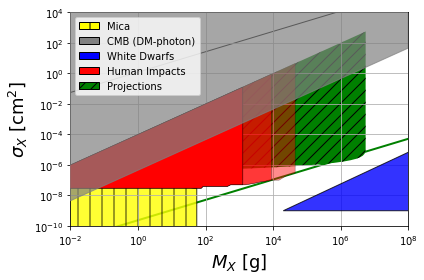

In [5]:
from scipy.interpolate import interp1d
import io
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os

from pylab import *

pi=np.pi
#matplotlib.pyplot.clf() #clear the plot
# file = open("mica_constraint.txt", 'r')
# data = file.read()
# cob = data.split()
# cob[0] = np.float(1.9952623149688828e-10)
# print(len(cob))
micalines = np.loadtxt("mica_constraint.txt",delimiter = ",",skiprows=1)

WD = [[4*10**21,8*10**8],[4*10**21,0.03],
      [2*10**20,2*10**-6],[1*10**19,6*10**-7],[1*10**16,3*10**-8],
      [9*10**14,1*10**-9],[1.01*10**8,1*10**-9],[2*10**4,1*10**-9],
      [4*10**21,8.01*10**8]]

JEM = [[5500010.535777831, 1.8923745940383394e-05], [5499470.134832158, 1.1299509456138018e-05], 
       [5399219.515059308, 7.502006278149246e-06], [5083417.986504935, 5.340783766377735e-06], 
       [4493264.409916191, 3.994859442491453e-06], [3685334.116545996, 3.1003189210718823e-06], 
       [2787731.573761691, 2.4757639550795837e-06], [1939235.9798781779, 2.022545331646006e-06], 
       [1239115.3509449656, 1.683275646897753e-06], [727065.6569064545, 1.422726997078772e-06], 
       [391815.88356178754, 1.218303091283315e-06], [193991.90947502453, 1.0549696328647376e-06], 
       [88276.93537542058, 9.224089351949403e-07], [36933.53027001961, 8.133495801265319e-07], 
       [14209.07715775438, 7.225475725684767e-07], [5024.262964388126, 6.461439717356806e-07], 
       [1628.5333115838018, 5.812480153864172e-07], [478.63756823718353, 5.256596094550942e-07], 
       [121.59773383862982, 4.776803718028475e-07], [19.85679553373476, 4.3598234827573353e-07],
       [1,3.2e-07],[1.31,1.31*10**-4],[5500000,550],
       [5495887.799172671, 0.0008572618882313399]]


shot=[[25.0, 3.0000000000000004e-08], [35.0, 3.0000000000000004e-08], [45.0, 3.0000000000000004e-08], 
       [55.0, 3.0000000000000004e-08], [65.0, 3.0000000000000004e-08], [75.0, 3.0000000000000004e-08], 
       [85.0, 4e-08], [150.0, 4e-08], [250.0, 4e-08], [350.0, 4e-08], [450.0, 4e-08], [550.0, 5e-08], 
       [650.0, 5e-08], [750.0, 5e-08], [850.0, 5e-08], [1500.0, 5e-08], [2500.0, 6.000000000000001e-08], 
       [3500.0, 7e-08], [4500.0, 8e-08], [5500.0, 8e-08], [6500.0, 9.000000000000001e-08], 
       [7500.0, 9.000000000000001e-08], [8500.0, 1.0000000000000001e-07], [15000.0, 1.0000000000000001e-07], 
       [25000.0, 2.0000000000000004e-07], [45000, 3e-07], [45000, 4.5],
        [0.00030000000000000003, 3.0000000000000004e-08]]

shot10=[[25.0, 3.0000000000000004e-08], [35.0, 3.0000000000000004e-08], [45.0, 3.0000000000000004e-08], 
       [55.0, 3.0000000000000004e-08], [65.0, 3.0000000000000004e-08], [75.0, 3.0000000000000004e-08], 
       [85.0, 4e-08], [150.0, 4e-08], [250.0, 4e-08], [350.0, 4e-08], [450.0, 4e-08], [550.0, 5e-08], 
       [650.0, 5e-08], [750.0, 5e-08], [850.0, 5e-08], [1500.0, 5e-08], [2500.0, 6.000000000000001e-08], 
       [3500.0, 7e-08], [4500.0, 8e-08], [5500.0, 8e-08], [6500.0, 9.000000000000001e-08], 
       [7500.0, 9.000000000000001e-08], [8500.0, 1.0000000000000001e-07], [8840,1e-07], [8840,0.884],
        [0.00030000000000000003, 3.0000000000000004e-08]]

shot100=[[25.0, 3.0000000000000004e-08], [35.0, 3.0000000000000004e-08], [45.0, 3.0000000000000004e-08], 
       [55.0, 3.0000000000000004e-08], [65.0, 3.0000000000000004e-08], [75.0, 3.0000000000000004e-08], 
       [85.0, 4e-08], [150.0, 4e-08], [250.0, 4e-08], [350.0, 4e-08], [450.0, 4e-08], [550.0, 5e-08], 
       [650.0, 5e-08], [750.0, 5e-08], [850.0, 5e-08], [1270.0, 5e-08], [1270,0.127],
        [0.00030000000000000003, 3.0000000000000004e-08]]

def CMB(M):
    f = 4.5*10**-7 * M
    return f

#LSS constraint (Boehm)
def LSS(M):
    f = 6*10**-10 * M
    return f

#Nuclear Density
def nuc(M):
    f = pi*(3/(4*pi*3.6*10**14))**(2./3) *pow(M,2./3)
    return f

#Black Holes
def BH(M):
    f = pi*(3*10**5)**2 *(M/(2.*10**33))**2
    return f

#Atomic Density
def atom(M):
    f = pi*(3/(4*pi*1*10**0))**(2./3) *pow(M,2./3)
    return f

M1=np.logspace(-2,8)
MMica = np.logspace(-10, 2.204)# for M_max=160g
MMica1 = np.logspace(-12,1.43,num=1000)#  2.204 for M_max=160g  1.74 for M_max = 55g  1.43 for M_max=27.5g
MMica2 = np.logspace(1.43,1.74,num=1000)

#MMica = np.logspace(-12,1.74,num=1000)#  2.204 for M_max=160g  1.74 for M_max = 55g
#MSkylab = np.logspace(-18,-6.4,num=1000)
#McausalTE = np.logspace(38.5,log(M1.max()))#total energy
#McausalTM = np.logspace(32,log(M1.max()))#matter

#Define Plot
fig = plt.figure()
ax = fig.add_subplot(111)

#X-axis
ax.set_xlabel('$M_\t{X}$ [g]',fontsize=18)
#xmin=-2
#xmax=40
ax.set_xlim([M1.min(),M1.max()])

#Y-axis
ymin=10**-10#nuc(M1).min()#10**(-15)
ymax=float(10**4)#nuc(M1).max()#10**15
ax.set_ylim([ymin,ymax])
ax.set_ylabel('$\sigma_\t{X}$ [cm$^{2}$]',fontsize=18)

#Make Plot
ax.loglog(M1, atom(M1), 'k', markersize=4, color='k',lw=1,label='Atomic density',zorder=0)
ax.loglog(M1, nuc(M1), 'k', markersize=4, color='g',lw=2,label='Nuclear density',zorder=0)

line3 = plt.Polygon(micalines, closed=None, fill=True, facecolor='yellow', edgecolor='black',alpha=0.8, hatch="|",lw=1,zorder=0)# edgecolor='r'
plt.gca().add_line(line3)

#plt.fill_between(M1, SIDM(M1),ymax,where=None, color='0.5',edgecolor='black',hatch="\\",alpha=.6,zorder=4)#SIDM 
plt.fill_between(M1, CMB(M1),ymax,where=None, color='grey',edgecolor='black',hatch="",alpha=.7,zorder=5)#SIDM ,alpha=.5

lines1 = plt.Polygon(shot, closed = True, fill = True, facecolor = 'red', edgecolor='black',alpha = 0.45, lw = 0.5,hatch = "",zorder=3)
plt.gca().add_line(lines1)

lines1 = plt.Polygon(shot10, closed = True, fill = True, facecolor = 'red', edgecolor='black',alpha = 0.6, lw = 0.5,hatch = "",zorder=3)
plt.gca().add_line(lines1)

lines1 = plt.Polygon(shot100, closed = True, fill = True, facecolor = 'red', edgecolor='black',alpha = 1.0, lw = 0.5,hatch = "",zorder=3)
plt.gca().add_line(lines1)

lineWD = plt.Polygon(WD, closed=None, fill=True, facecolor='blue', edgecolor='black',alpha=0.8, hatch="",lw=1,zorder=2)# edgecolor='r'
plt.gca().add_line(lineWD)

lineh = plt.Polygon(JEM, closed = True, fill = True, facecolor = 'green', alpha = 1, lw = 0.1,hatch = "//",zorder=0)
plt.gca().add_line(lineh)

legBoehm_CMB = Rectangle((0, 0), 1, 1, fc='grey',edgecolor='black', hatch="",alpha=1)
legMicaEl = Rectangle((0, 0), 1, 1, fc="yellow",edgecolor='black', hatch="|",alpha=1)
legsedi1 = Rectangle((0, 0), 1, 1, fc="blue",edgecolor='black', hatch="",alpha=1)
legWD = Rectangle((0, 0), 1, 1, fc="red",edgecolor='black', hatch="",alpha=1)
legprojections = Rectangle((0, 0), 1, 1, fc="green",edgecolor='black', hatch="//",alpha=1)

# legauger = Rectangle((0, 0), 1, 1,fc="purple", edgecolor='black', alpha=1, hatch="")
# legaugerfull = Rectangle((0, 0), 1, 1,fc="purple", edgecolor='black', alpha=1, hatch="//")
# legJEM = Rectangle((0, 0), 1, 1,fc="green", edgecolor='black', alpha=1, hatch="")
# legbolide=Rectangle((0, 0), 1, 1,fc="blue", edgecolor='black', alpha=1, hatch="")

# leg = ax.legend(loc='upper right', shadow=True)
leg2 = legend(([legMicaEl, legBoehm_CMB, legsedi1, legWD, legprojections]),[ "Mica", "CMB (DM-photon)", "White Dwarfs", "Human Impacts", "Projections"],loc='upper left')
# gca().add_artist(leg) #Needto add this back otherwise leg2 removes it  ,legBBNcausalT,legBBNcausalM   ,"Causality (T)","Causality (M)"

ax.grid(True)
plt.tight_layout()
plt.savefig('humankills.pdf')

plt.show()

In [69]:
# P(n <= 100) and P(n <= 10) checks
import numpy as np
import math
totalsum = 0.0
for n in range(0,101):
    Mass = 1270  # vary this to determine 95% bounds
    commonterm= np.exp(-150000/Mass)
    totalsum = totalsum + commonterm*((150000/Mass)**n/(math.factorial(n)))
print(totalsum,n)

0.04971423676378122 100
